# Time Series Analysis

## Import Libraries

In [1]:
import pandas as pd 
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
from pandas import Series 
from fbprophet import Prophet
from datetime import datetime
from matplotlib.pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')

insta_names = ['exploringlondon','london','londonbeautifullife','visitlondon']
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

## Functions

In [2]:
def rolling_stats(df_name): 
    '''
    Determine rollin statistics 
    
    parameters: 
        df_name: the dataframe that will be used to calculate rolling stats
    
    ''' 
    roll_mean = df_name.rolling(window=12, center=False).mean()
    roll_std = df_name.rolling(window=12, center=False).std()
    fig = plt.figure(figsize=(12,6))
    plt.plot(df_name, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

In [3]:
def dickey_fuller(df_name):
    '''
    prints the resilts of the dickey fuller test
    
    Parameters: 
        df_name: The dataframe to be used for the calculations

    
    '''
    dftest = adfuller(df_name)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print ('Results of Dickey-Fuller test: \n')
    print(dfoutput)

## Data Cleaning

In [4]:
df_images = pd.read_csv('insta_cleaned.csv')

In [5]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5943 entries, 0 to 5942
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5943 non-null   int64 
 1   insta_name       5943 non-null   object
 2   source_image     5920 non-null   object
 3   Caption          5943 non-null   object
 4   Caption_length   5943 non-null   int64 
 5   followers        5943 non-null   int64 
 6   num_of_likes     5943 non-null   int64 
 7   media_type       5943 non-null   object
 8   video_views      5943 non-null   int64 
 9   num_of_hashtags  5943 non-null   int64 
 10  num_of_mentions  5943 non-null   int64 
 11  date             5943 non-null   object
 12  time             5943 non-null   int64 
 13  day              5943 non-null   object
dtypes: int64(8), object(6)
memory usage: 650.1+ KB


In [6]:
time_series = df_images.groupby('date')['num_of_likes'].mean().reset_index()

In [7]:
time_series['date'] = pd.to_datetime(time_series['date'])

In [8]:
time_series = time_series.set_index('date')
time_series.index

DatetimeIndex(['2017-04-28', '2017-04-29', '2017-05-01', '2017-05-02',
               '2017-05-03', '2017-05-04', '2017-05-05', '2017-05-06',
               '2017-05-07', '2017-05-08',
               ...
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13',
               '2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19'],
              dtype='datetime64[ns]', name='date', length=1332, freq=None)

In [9]:
time_series = time_series['num_of_likes'].resample('MS').mean()

In [10]:
time_series['2018']

date
2018-01-01     4045.305632
2018-02-01     3897.775510
2018-03-01     3431.940361
2018-04-01     3237.594008
2018-05-01     4136.027112
2018-06-01     2956.995913
2018-07-01     3785.421146
2018-08-01     4019.221339
2018-09-01     8472.491865
2018-10-01    13462.567153
2018-11-01    14273.871481
2018-12-01    14974.991244
Freq: MS, Name: num_of_likes, dtype: float64

### Drop null values

In [11]:
time_series = time_series.dropna()

## Making Data Stationary

In [12]:
roll_mean = time_series.rolling(window =4 ).mean()

In [13]:
time_final = time_series - roll_mean

In [14]:
time_final.dropna(inplace = True)

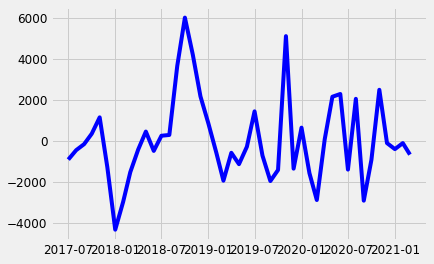

In [15]:
plt.plot(time_final, color='blue',label='Check')

In [16]:
dickey_fuller(time_final)

Results of Dickey-Fuller test: 

Test Statistic                 -4.276463
p-value                         0.000488
#Lags Used                      7.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


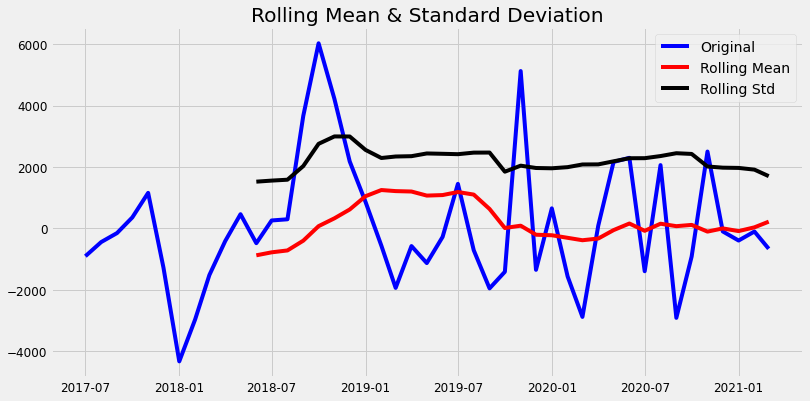

In [17]:
rolling_stats(time_final)

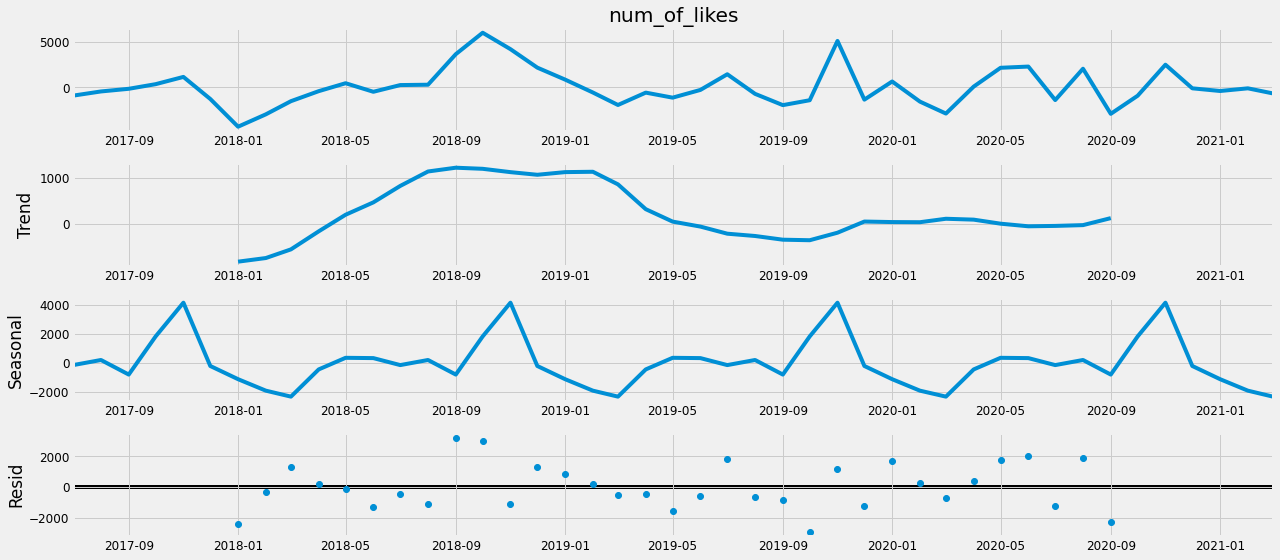

In [18]:
rcParams['figure.figsize']=18,8
decomposition = sm.tsa.seasonal_decompose(time_final, model = 'additive')
fig = decomposition.plot()
plt.show()


## FBProphet 

In [19]:
time_series = pd.DataFrame({'Order Date':time_series.index, 'Sales':time_series.values})
time_series = time_series.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
time_series

,ds,y
0,2017-04-01,12462.500000
1,2017-05-01,10392.489247
2,2017-06-01,9764.479885
3,2017-07-01,9662.769841
4,2017-08-01,9344.150000
5,2017-09-01,9384.833333
6,2017-10-01,9938.187500
7,2017-11-01,11096.455128
8,2017-12-01,8436.488889
9,2018-01-01,4045.305632


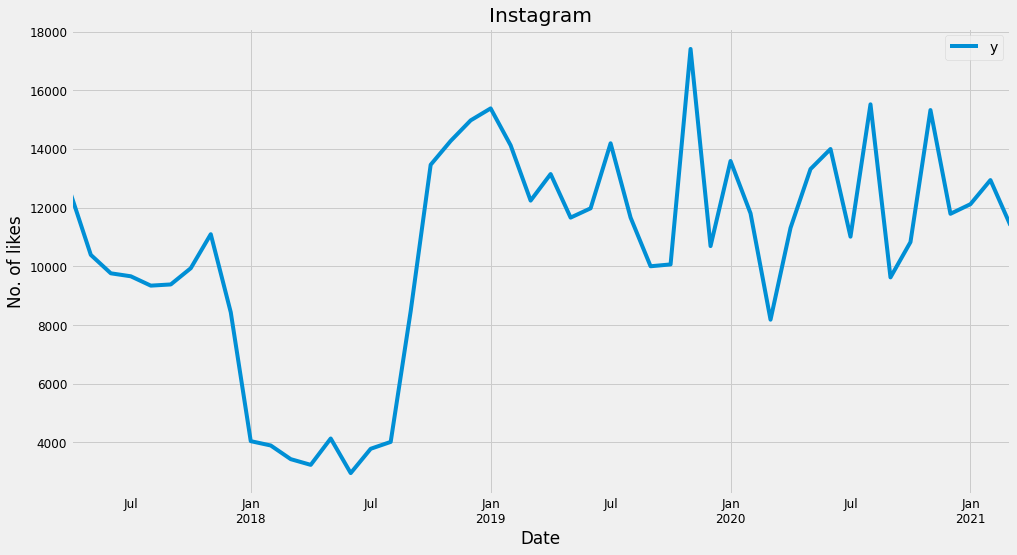

In [20]:
# Plot the timeseries 
pd.plotting.register_matplotlib_converters()
ax = time_series.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('No. of likes')
ax.set_xlabel('Date')
plt.title('Instagram')
plt.show()

In [21]:
insta_model = Prophet(interval_width=0.95)


In [22]:
insta_model.fit(time_series)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [33]:
insta_forecast = insta_model.make_future_dataframe(periods=12, freq='MS')
insta_forecast = insta_model.predict(insta_forecast)

<Figure size 1440x576 with 0 Axes>

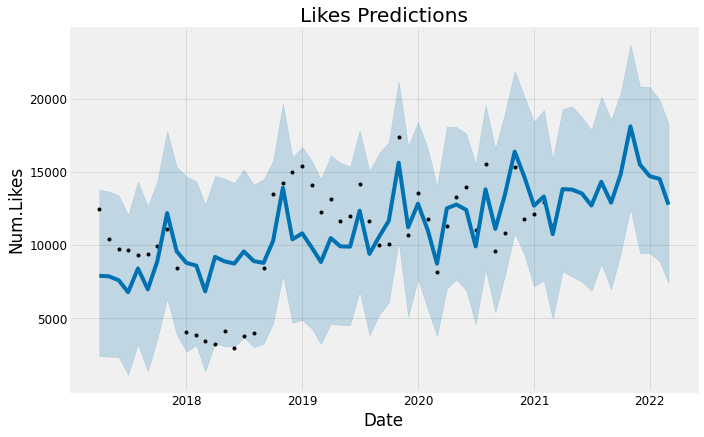

In [34]:
plt.figure(figsize=(20, 8))
insta_model.plot(insta_forecast, xlabel = 'Date', ylabel = 'Num.Likes')
plt.title('Likes Predictions');

There is seasonality in this data as explained before, towards the end of the year the account tends to get more likes. It can be seen that this actually happens in the predictions. However, the further the predictions are the less reliable it is.

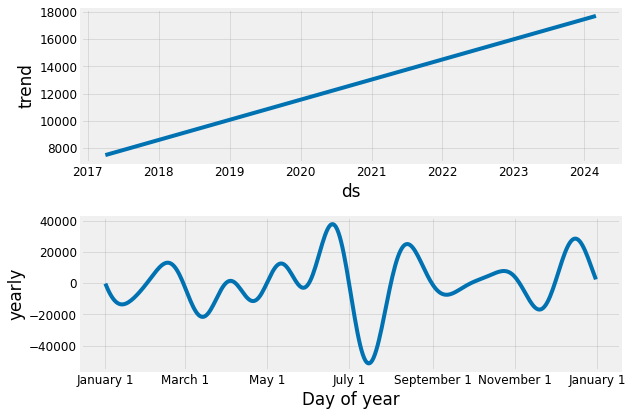

In [25]:
insta_model.plot_components(insta_forecast);


The amount of likes trend higher overtime. In this particular case this will only keep happening if the account is treated the same way, meaning, posting the same quality pictures, posting at the same times and the same days. One way to look at this is checking what will happen if only the days and times that get the more likes are used to post and check if this will increament the amount of likes the account will get. 